In [ ]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
 

In [58]:
#Getting dataframe from csv file
df = pd.read_csv("movie_data.csv")
pd.set_option('display.max_columns', None)
display(df.head())

,Title,Release Date,Inflation Adjusted Domestic Revenue,Domestic Revenue,International Revenue,Total Box Office Revenue,Domestic Video Revenue,Opening Weekend,Production Budget,Theater Number,MPAA Rating,Runtime,Genre,Franchise,Production Method,Video Release Date,Domestic DVD Revenue,Domestic Bluray Revenue,Month,Year,Season,Profit
0,Ride Along,2014-01-17,185781035.0,134202565.0,19531235.0,153733800.0,32235555.0,41516170.0,25000000.0,2867.0,PG,100.0,Comedy,Ride Along,Live Action,2014-04-15,21354671.0,10880884.0,1.0,2014.0,Winter,128733800.0
1,Endless Love,2014-02-14,32446343.0,23438250.0,11279923.0,34718173.0,5650051.0,13307125.0,20000000.0,2896.0,PG,105.0,Drama,NaN,Live Action,2014-05-27,4314112.0,1335939.0,2.0,2014.0,Winter,14718173.0
2,A Million Ways to Die in The West,2014-05-30,59140035.0,42720965.0,44057592.0,86778557.0,15244102.0,16797385.0,40000000.0,3160.0,R,115.0,Western,NaN,Live Action,2014-10-07,9630534.0,5613568.0,5.0,2014.0,Spring,46778557.0
3,The Anomaly,2015-09-25,NaN,NaN,105632.0,105632.0,NaN,NaN,NaN,NaN,Not Rated,96.0,Action,NaN,Live Action,NaN,NaN,NaN,9.0,2015.0,Fall,NaN
4,Boyhood,2014-07-11,35086086.0,25379975.0,31893074.0,57273049.0,6319139.0,387618.0,4000000.0,775.0,R,164.0,Drama,NaN,Live Action,2015-01-06,3794682.0,2524457.0,7.0,2014.0,Summer,53273049.0


In [59]:
#check correlation between the different earnings
df.corr(numeric_only=True)

#domestic revenue, international revenue, total box revenue, and domestic video revenue, are all strongly correlated (between0.9 and 0.8)
# thus we dont need to do analysis for all of them one will strongly correlate with another but a graph to show which would be good.

,Inflation Adjusted Domestic Revenue,Domestic Revenue,International Revenue,Total Box Office Revenue,Domestic Video Revenue,Opening Weekend,Production Budget,Theater Number,Runtime,Domestic DVD Revenue,Domestic Bluray Revenue,Month,Year,Profit
Inflation Adjusted Domestic Revenue,1.000000,0.988986,0.845688,0.929063,0.833442,0.950344,0.511400,0.560468,0.137451,0.780602,0.852619,-0.081826,-0.107609,0.934480
Domestic Revenue,0.988986,1.000000,0.833409,0.924478,0.762171,0.942916,0.525543,0.571425,0.151164,0.704336,0.788123,-0.070794,-0.020963,0.926134
International Revenue,0.845688,0.833409,1.000000,0.981282,0.749621,0.848824,0.695213,0.498169,0.175903,0.685929,0.777023,-0.101224,-0.081818,0.960576
Total Box Office Revenue,0.929063,0.924478,0.981282,1.000000,0.778929,0.914988,0.664753,0.543357,0.172566,0.715224,0.806402,-0.092632,-0.065265,0.988647
Domestic Video Revenue,0.833442,0.762171,0.749621,0.778929,1.000000,0.784715,0.440700,0.406222,0.070274,0.978963,0.987980,-0.101716,-0.283579,0.778925
Opening Weekend,0.950344,0.942916,0.848824,0.914988,0.784715,1.000000,0.554679,0.586074,0.165187,0.737902,0.808918,-0.152239,-0.072551,0.908836
Production Budget,0.511400,0.525543,0.695213,0.664753,0.440700,0.554679,1.000000,0.519260,0.351751,0.356323,0.488259,-0.073929,0.164424,0.544957
Theater Number,0.560468,0.571425,0.498169,0.543357,0.406222,0.586074,0.519260,1.000000,0.080149,0.384517,0.415343,-0.249906,0.033188,0.523003
Runtime,0.137451,0.151164,0.175903,0.172566,0.070274,0.165187,0.351751,0.080149,1.000000,0.018185,0.102433,0.080953,0.098635,0.128938
Domestic DVD Revenue,0.780602,0.704336,0.685929,0.715224,0.978963,0.737902,0.356323,0.384517,0.018185,1.000000,0.935994,-0.117623,-0.345193,0.720783


In [60]:
# check the number of NAs
df.isna().sum()

Title                                    0
Release Date                             0
Inflation Adjusted Domestic Revenue      9
Domestic Revenue                         9
International Revenue                    7
Total Box Office Revenue                 7
Domestic Video Revenue                  36
Opening Weekend                          9
Production Budget                       38
Theater Number                           9
MPAA Rating                              2
Runtime                                  5
Genre                                    0
Franchise                              127
Production Method                        0
Video Release Date                      58
Domestic DVD Revenue                    38
Domestic Bluray Revenue                 37
Month                                    0
Year                                     0
Season                                   0
Profit                                  40
dtype: int64

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(-25.0, 0, '2023-08-11'),
  Text(0.0, 0, '2014-01-17'),
  Text(25.0, 0, '2015-06-04'),
  Text(50.0, 0, '2016-06-17'),
  Text(75.0, 0, '2017-11-03'),
  Text(100.0, 0, '2020-06-18'),
  Text(125.0, 0, '2022-04-08'),
  Text(150.0, 0, '2023-01-06'),
  Text(175.0, 0, '2024-06-21'),
  Text(200.0, 0, '')])

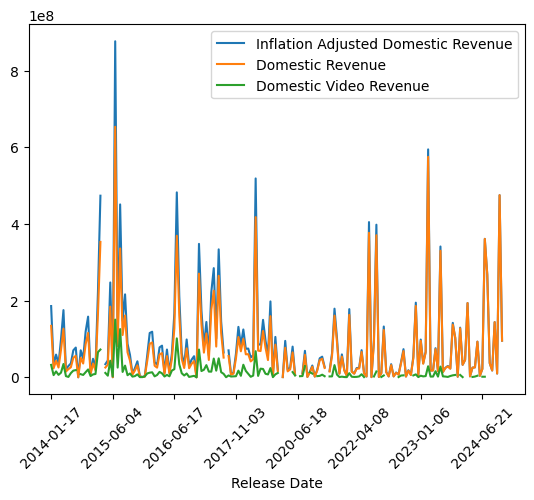

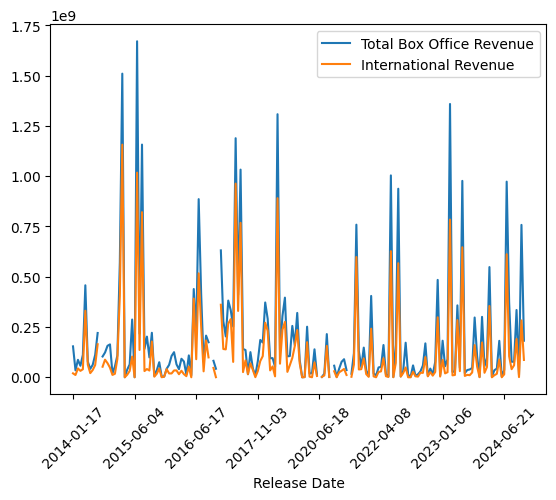

In [61]:
# graph of the revenues
mean_of = pd.DataFrame()

mean_of = df.groupby('Release Date')[['Inflation Adjusted Domestic Revenue','Domestic Revenue', 'Total Box Office Revenue','International Revenue','Domestic Video Revenue']].mean()
# 'Total Box Office Revenue','International Revenue',

mean_of[['Inflation Adjusted Domestic Revenue','Domestic Revenue','Domestic Video Revenue']].plot()
plt.xticks(rotation=45)

mean_of[['Total Box Office Revenue','International Revenue']].plot()
plt.xticks(rotation=45)

# the graphs show the correlations  and the difference in there earnings


(array([2012., 2014., 2016., 2018., 2020., 2022., 2024., 2026.]),
 [Text(2012.0, 0, '2012'),
  Text(2014.0, 0, '2014'),
  Text(2016.0, 0, '2016'),
  Text(2018.0, 0, '2018'),
  Text(2020.0, 0, '2020'),
  Text(2022.0, 0, '2022'),
  Text(2024.0, 0, '2024'),
  Text(2026.0, 0, '2026')])

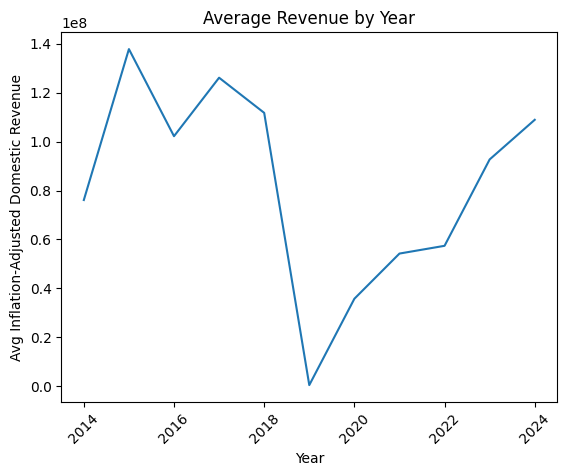

In [62]:
# this shows a more simplified version of the above graph
df['Release_Date'] = pd.to_datetime(df['Release Date'])
df['year'] = df['Release_Date'].dt.year

yearly = df.groupby('year')['Inflation Adjusted Domestic Revenue'].mean().reset_index()


plt.plot(yearly['year'], yearly['Inflation Adjusted Domestic Revenue'])
plt.xlabel('Year')
plt.ylabel('Avg Inflation-Adjusted Domestic Revenue')
plt.title('Average Revenue by Year')
plt.xticks(rotation=45)



In [63]:
# check why it drops at 2019
for title in df.loc[df['year'] == 2019, 'Title']:
    print(title)
# it appears that there was only one movie that year and it didnt do well.

Seberg
The Wolf Hour


(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(-25.0, 0, '2023-08-11'),
  Text(0.0, 0, '2014-01-17'),
  Text(25.0, 0, '2015-06-04'),
  Text(50.0, 0, '2016-06-17'),
  Text(75.0, 0, '2017-11-03'),
  Text(100.0, 0, '2020-06-18'),
  Text(125.0, 0, '2022-04-08'),
  Text(150.0, 0, '2023-01-06'),
  Text(175.0, 0, '2024-06-21'),
  Text(200.0, 0, '')])

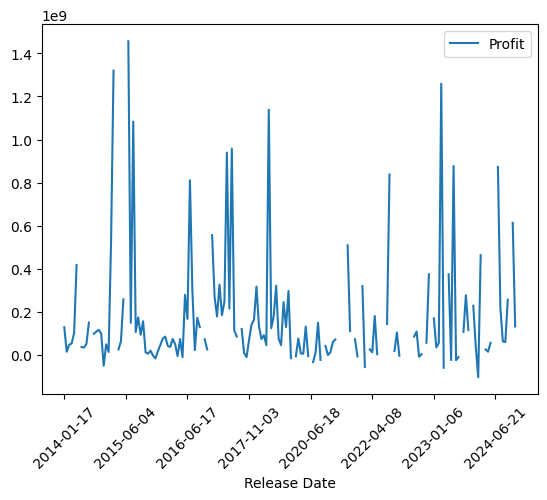

In [64]:
#Doing the same as above for profits
mean_of = pd.DataFrame()
mean_of = df.groupby('Release Date')[['Profit']].mean()
mean_of[['Profit']].plot()
plt.xticks(rotation=45)

(array([2012., 2014., 2016., 2018., 2020., 2022., 2024., 2026.]),
 [Text(2012.0, 0, '2012'),
  Text(2014.0, 0, '2014'),
  Text(2016.0, 0, '2016'),
  Text(2018.0, 0, '2018'),
  Text(2020.0, 0, '2020'),
  Text(2022.0, 0, '2022'),
  Text(2024.0, 0, '2024'),
  Text(2026.0, 0, '2026')])

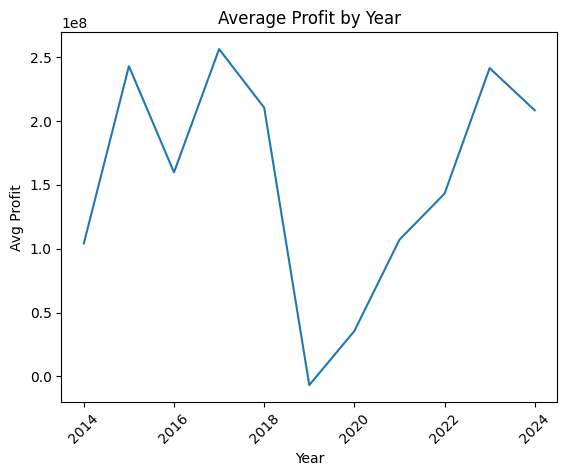

In [65]:
# this shows a more simplified version of the above graph
df['Release_Date'] = pd.to_datetime(df['Release Date'])
df['year'] = df['Release_Date'].dt.year

yearly = df.groupby('year')['Profit'].mean().reset_index()


plt.plot(yearly['year'], yearly['Profit'])
plt.xlabel('Year')
plt.ylabel('Avg Profit')
plt.title('Average Profit by Year')
plt.xticks(rotation=45)

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(-25.0, 0, '2023-08-11'),
  Text(0.0, 0, '2014-01-17'),
  Text(25.0, 0, '2015-06-04'),
  Text(50.0, 0, '2016-06-17'),
  Text(75.0, 0, '2017-11-03'),
  Text(100.0, 0, '2020-06-18'),
  Text(125.0, 0, '2022-04-08'),
  Text(150.0, 0, '2023-01-06'),
  Text(175.0, 0, '2024-06-21'),
  Text(200.0, 0, '')])

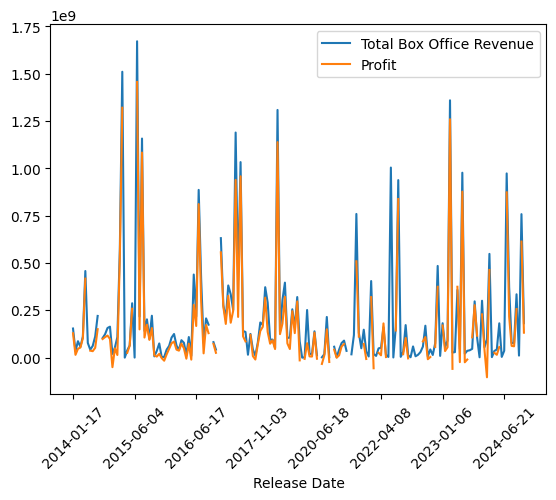

In [66]:
mean_of = pd.DataFrame()
mean_of = df.groupby('Release Date')[['Total Box Office Revenue','Profit']].mean()
# 'Total Box Office Revenue','International Revenue',
mean_of[['Total Box Office Revenue','Profit']].plot()
plt.xticks(rotation=45)

In [67]:
#Seems to follow the same trend as revenue

In [68]:
# checking data 
len(df)
#212
df['Inflation Adjusted Domestic Revenue'].describe()



count    1.840000e+02
mean     9.166218e+07
std      1.253947e+08
min      1.192100e+04
25%      1.612724e+07
50%      5.366071e+07
75%      1.048190e+08
max      8.763738e+08
Name: Inflation Adjusted Domestic Revenue, dtype: float64

In [69]:
df['Domestic Revenue'].describe()

count    1.840000e+02
mean     7.700907e+07
std      1.056860e+08
min      8.886000e+03
25%      1.482090e+07
50%      4.310387e+07
75%      9.222670e+07
max      6.534066e+08
Name: Domestic Revenue, dtype: float64

In [70]:
df['International Revenue'].describe()

count    1.860000e+02
mean     1.188179e+08
std      2.075318e+08
min      1.259000e+03
25%      9.771500e+06
50%      3.498074e+07
75%      1.041047e+08
max      1.157058e+09
Name: International Revenue, dtype: float64

In [71]:
# product budget is most strongly correlated with international earnings, this implies that the hight earning movies had the most funding (on average)

# run time isn't strongly correlated with anything but its strongest correlation (0.3) is with product budget, this could mean tha with more budget 
# you make longer movies and there for do better but no definite information on this

#most of the numeric variables seem uninteresting so I will move on

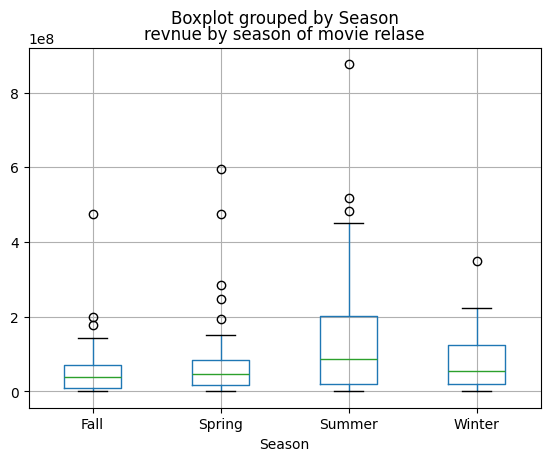

In [72]:
# catigorical vareable enalasis

df.boxplot(column='Inflation Adjusted Domestic Revenue', by='Season')
plt.title('revnue by season of movie relase')
plt.show()


In [ ]:
# spring and summer have the most revinue but summer has the most outlisers and revine 

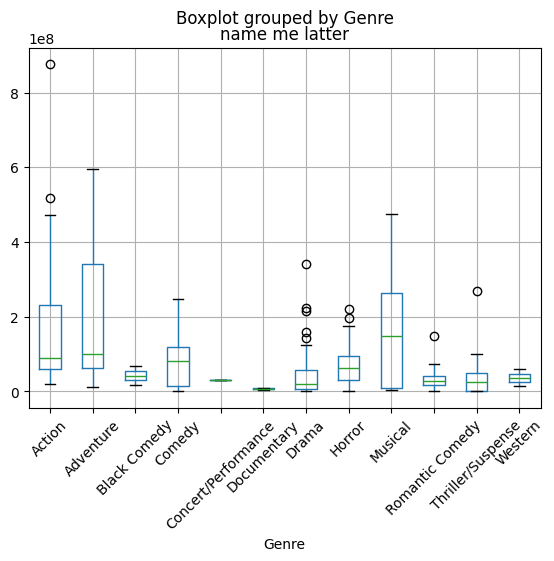

In [ ]:
#
df.boxplot(column='Inflation Adjusted Domestic Revenue', by='Genre')
plt.xticks(rotation=45)
plt.title('name me latter')
plt.show()


In [92]:
filtered = df[df['Season'] == 'Winter']
mean_val = filtered['Inflation Adjusted Domestic Revenue'].mean()
std_val = filtered['Inflation Adjusted Domestic Revenue'].std()

print("Mean:", mean_val)
print("Standard deviation:", std_val)
df.groupby('Season')['Inflation Adjusted Domestic Revenue'].agg(['mean','std'])


mean_ac.groupby('Genre')['Inflation Adjusted Domestic Revenue'].agg(['mean','std'])
#print(mean_ac)

Mean: 79548244.13043478
Standard deviation: 76233412.36291839


,mean,std
Genre,,


In [ ]:
# the means revinu for each season is as falowes
# fall   mean = 5.57 e^7, sd = 7.17e^7
# spring mena = 9.33 e^7, sd = 1.3 e^8
# summer mean = 1.4 e^8, sd = 1.8 e^8
# winter mean = 7.954 e^7,sd = 7.6 e^7
# the mean for all the data is 1.1 e^8
# spring and sumer are the 2 best season for movie relases though not statisticly significnt for most.

In [ ]:
# the difrent Genres are mostly the same with means but they have a lot of vareance and outliers. 
# doucumnteries are the lowes revanue erners 
# the highest erning movie is an action, but most of the out liers for high revinue are from adventure
# 

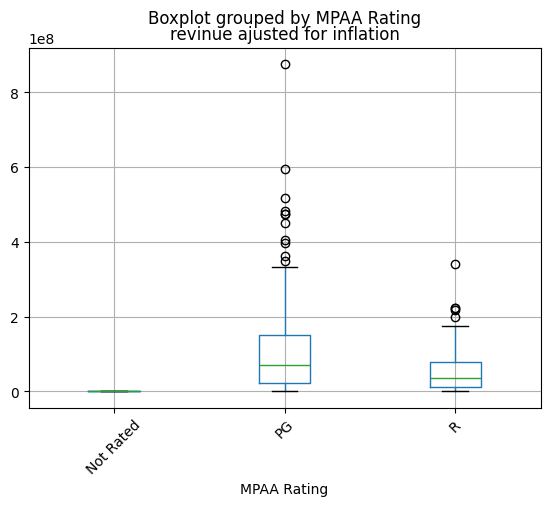

In [ ]:
df.boxplot(column='Inflation Adjusted Domestic Revenue', by='MPAA Rating')
plt.xticks(rotation=45)
plt.title('revinue ajusted for inflation')
plt.show()



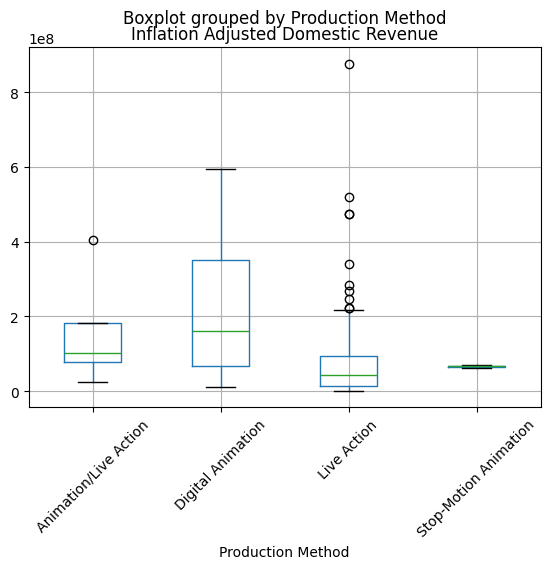

In [ ]:
#production method
df.boxplot(column='Inflation Adjusted Domestic Revenue', by='Production Method')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# most revinue comes from anamated videos but the outliers are in the live action section, the way to maxamise revinue would be to do mostly animation 
# videos but also do some live actions in hopes of hiting an outlier sale.

In [ ]:
# the earning for movies is mostly PG with a few in R. the means are genaraly the same but

In [ ]:
# the most resanable option for getting a high revinue movie wold be to releas a PG rated action movie in summer and should have a longer run time, 
# though it should be noted that this would only test wether one predicts the other or if they are only related